   Customer Segment            Product Sub-Category  Sum product
0          Consumer                 Copiers and Fax           16
1          Consumer   Scissors, Rulers and Trimmers           72
2          Consumer                    Rubber Bands           88
3          Consumer                       Bookcases          128
4          Consumer                       Envelopes          153
5          Consumer                          Tables          161
6          Consumer                          Labels          171
7          Consumer                 Office Machines          181
8          Consumer                      Appliances          226
9          Consumer          Storage & Organization          236
10         Consumer              Chairs & Chairmats          346
11         Consumer    Telephones and Communication          447
12         Consumer  Binders and Binder Accessories          447
13         Consumer            Computer Peripherals          608
14         Consumer      

C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


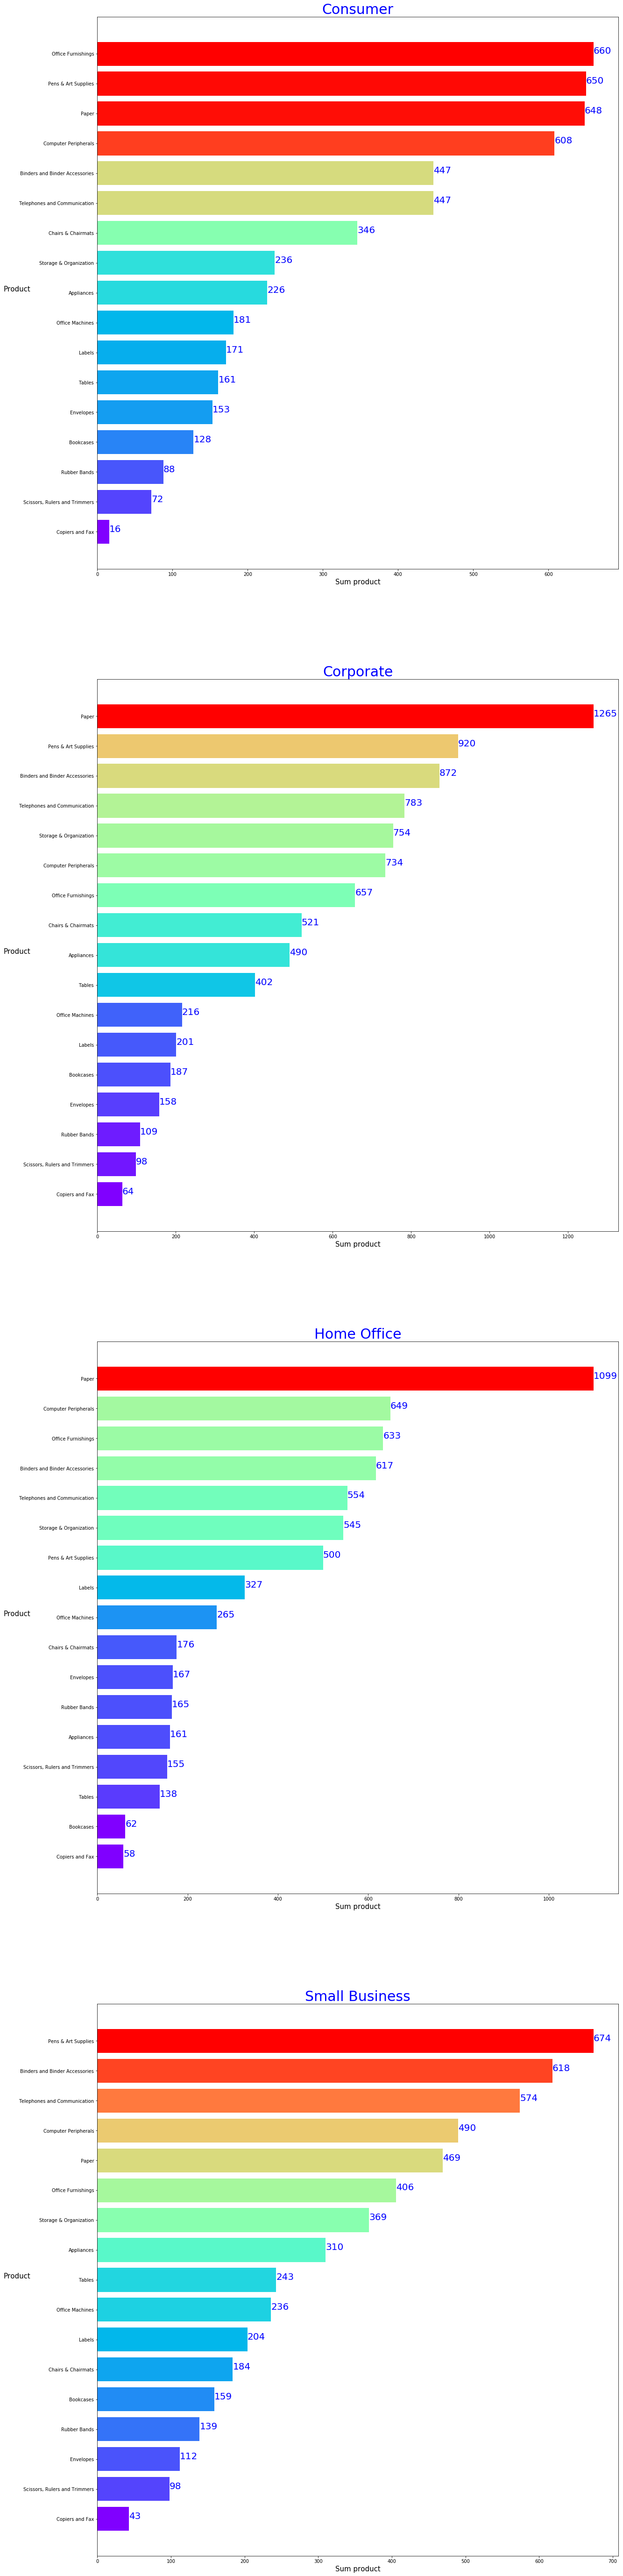

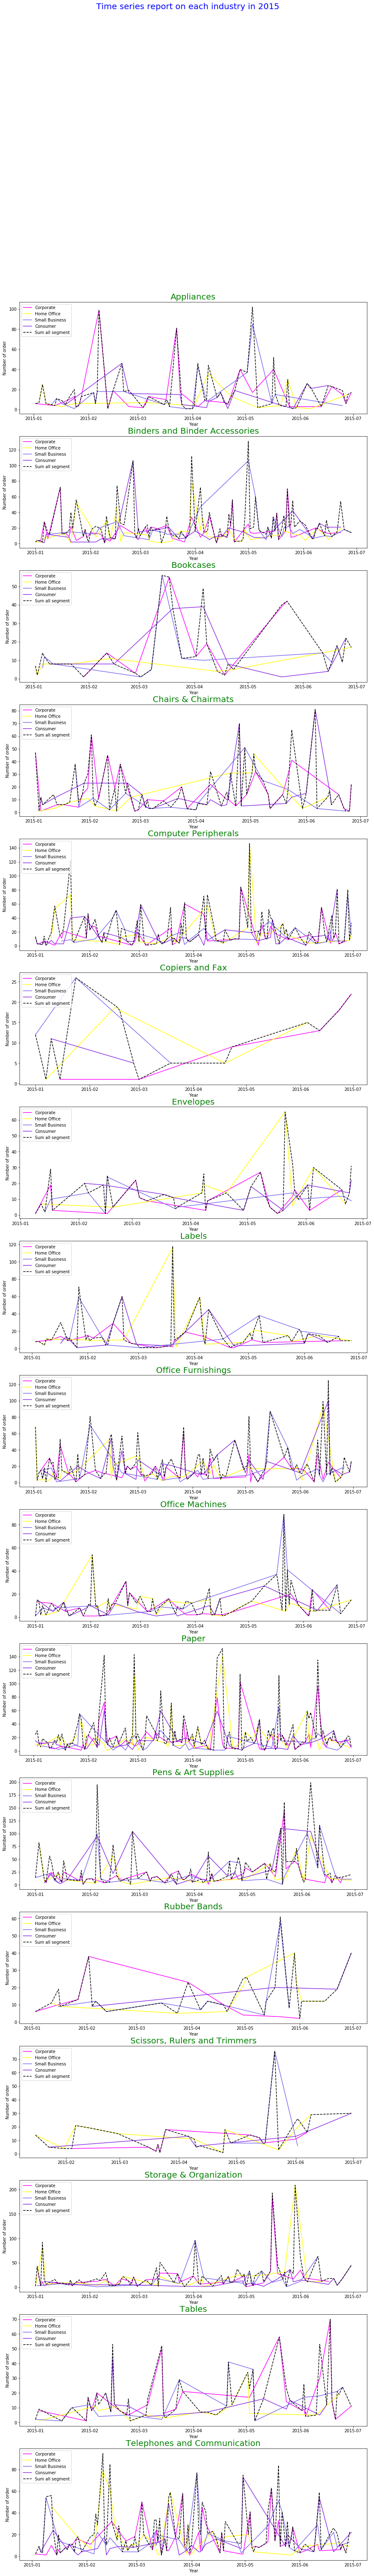

In [169]:
#ex1
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns

def cmap(values):
	cmap = cm.get_cmap('rainbow')
	normalize = matplotlib.colors.Normalize(vmin=min(values), vmax=max(values))
	color = [cmap(normalize(value)) for value in values]
	return color

df = pd.read_excel('./Assignment 6-Data/US_Stores.xlsx')
df['Order Priority'] = df['Order Priority'].str.strip()
# print(df.head())

#report1
customerSegment = df.groupby(['Customer Segment', 'Product Sub-Category'])['Quantity ordered new'].sum().reset_index(name='Sum product')
customerSegment = customerSegment.groupby('Customer Segment')['Product Sub-Category', 'Sum product'].apply(lambda x: x.sort_values('Sum product')).reset_index().drop(['level_1'], axis=1)
print(customerSegment)


fig, ax = plt.subplots(customerSegment['Customer Segment'].nunique(), figsize=(20,100))

for index, segment in enumerate(customerSegment['Customer Segment'].unique()):
    colorcode = customerSegment[customerSegment['Customer Segment']==segment]['Sum product']
    ax[index].barh(customerSegment[customerSegment['Customer Segment']==segment]['Product Sub-Category'], customerSegment[customerSegment['Customer Segment']==segment]['Sum product'], color = cmap(colorcode))
    ax[index].set_ylabel('Product', rotation=0, fontsize=15)
    ax[index].set_xlabel('Sum product', fontsize=15)
    ax[index].set_title(segment, fontsize=30, color='blue')
    for i, v in enumerate(customerSegment[customerSegment['Customer Segment']==segment]['Sum product']):
        ax[index].text(v, i, str(v), color='blue', fontsize=20)

#fig.show()

quantity = df.groupby(['Product Sub-Category', 'Customer Segment', 'Order Date'])['Quantity ordered new'].sum().reset_index(name='Sum ordered')


fig, ax = plt.subplots(quantity['Product Sub-Category'].nunique(), figsize=(15,100))

segment = df['Customer Segment'].unique()
colorlist = ['#FF00FF', '#FFFF00', '#7B68EE', '#8A2BE2']
for index, value in enumerate(quantity['Product Sub-Category'].unique()):
    quantity_ = quantity[quantity['Product Sub-Category']==value]

    for i in range(df['Customer Segment'].nunique()):
        quantity0 = quantity_[quantity_['Customer Segment']==segment[i]]        
        ax[index].plot(quantity0['Order Date'], quantity0['Sum ordered'], c=colorlist[i], label=segment[i])
        
    sumOrder = quantity_.groupby('Order Date')['Sum ordered'].sum().reset_index()
    ax[index].plot(sumOrder['Order Date'], sumOrder['Sum ordered'], c='#000000', linestyle='--', label='Sum all segment')
    ax[index].set_title(value, fontsize=20, color='Green')
    ax[index].set_xlabel('Year')
    ax[index].set_ylabel('Number of order')
    ax[index].legend(loc='upper left')
    

        
fig.suptitle('Time series report on each industry in 2015', fontsize=20, color='Blue')
fig.show()

Ship Mode      Delivery Truck  Express Air  Regular Air    Sum
Ship Duration                                                 
0 days                   33.0         32.0        183.0  248.0
1 days                  101.0         68.0        479.0  648.0
10 days                   0.0          0.0          1.0    1.0
2 days                   89.0        107.0        505.0  701.0
3 days                   14.0         10.0         70.0   94.0
4 days                   17.0         12.0         59.0   88.0
5 days                    8.0          3.0         57.0   68.0
6 days                    1.0          0.0          7.0    8.0
7 days                   11.0          7.0         58.0   76.0
8 days                    0.0          1.0          5.0    6.0
9 days                    1.0          0.0         13.0   14.0


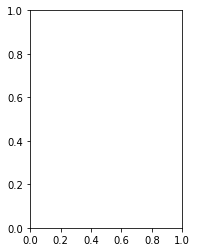

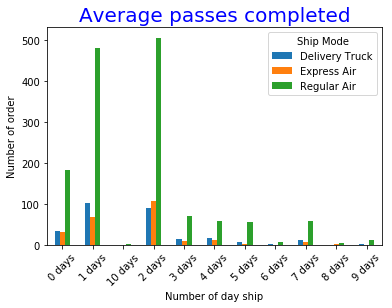

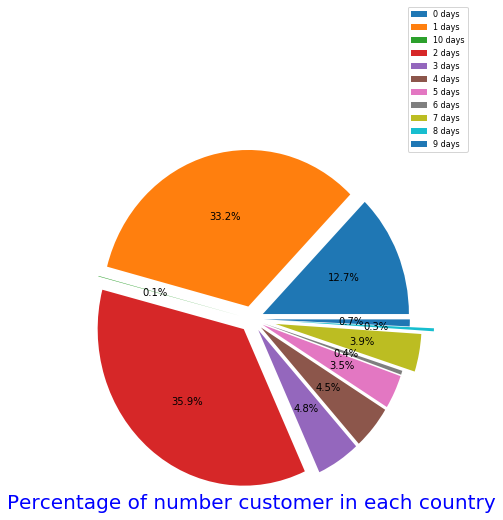

In [214]:
df['Ship Duration'] = df['Ship Date'] - df['Order Date']
df["Ship Duration"] = df["Ship Duration"].dt.days
df["Ship Duration"] = df["Ship Duration"].astype(str) + " days"


shipMode = shipdate.groupby('Ship Duration')['Ship Mode'].value_counts().reset_index(name='counting day of ship')
shipMode = shipMode.pivot(index='Ship Duration', columns='Ship Mode', values='counting day of ship').fillna(0)
shipMode['Sum'] = shipMode['Delivery Truck'] + shipMode['Express Air'] + shipMode['Regular Air']
print(shipMode)


plt.subplot(121)

shipMode.iloc[:,:-1].plot(kind='bar')
plt.title('Average passes completed', color = 'blue', fontsize=20)
plt.ylabel('Number of order')
plt.xticks(rotation=45)
plt.xlabel('Number of day ship')

plt.figure(figsize=(12,6))
plt.subplot(122)
_explode= [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.1]
plt.pie(shipMode['Sum'], explode = _explode, radius=1.2, autopct='%1.1f%%')
plt.title('Percentage of number customer in each country', color = 'blue', fontsize=20, y=-0.1)
plt.legend(shipMode.index, loc='best', fontsize=8, bbox_to_anchor=(1, 1))

plt.show()

C:\Users\Training\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 17 columns):
Order ID         8047 non-null object
Order Date       8047 non-null datetime64[ns]
Customer Name    8047 non-null object
City             8047 non-null object
Country          8047 non-null object
Region           8047 non-null object
Segment          8047 non-null object
Ship Date        8047 non-null datetime64[ns]
Ship Mode        8047 non-null object
State            8047 non-null object
Product Name     8047 non-null object
Discount         8047 non-null float64
Sales            8047 non-null int64
Profit           8047 non-null int64
Quantity         8047 non-null int64
Category         8047 non-null object
Sub-Category     8047 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(11)
memory usage: 1.1+ MB
None
            Country             City  Number in country  Number in city
0           Austria           Vienna          16.000000              93
1 

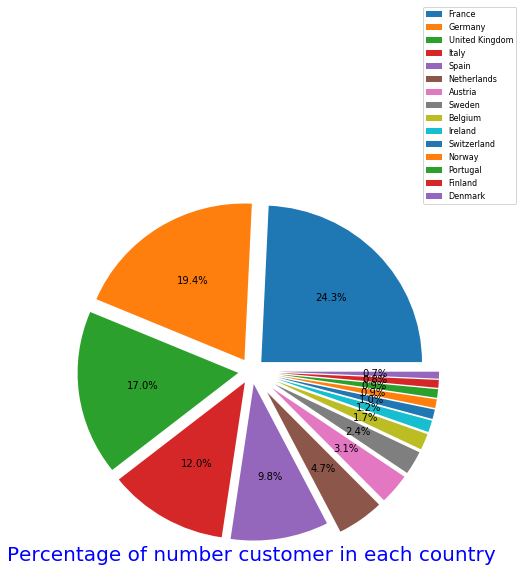

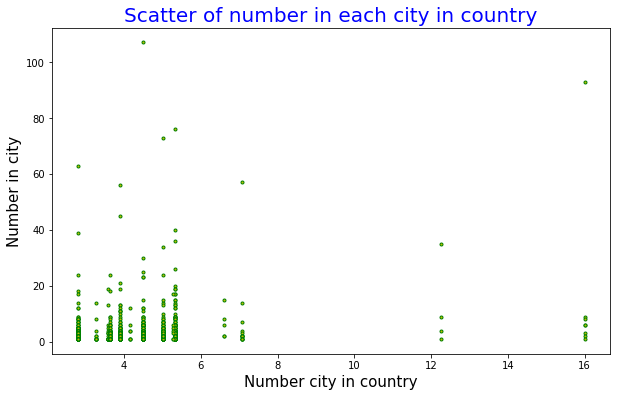

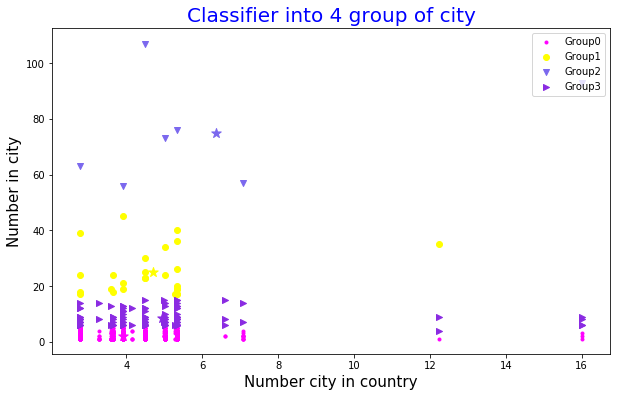

In [16]:
#Ex2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib

df0 = pd.read_excel('./Assignment 6-Data/EU_Marts.xlsx', sheetname='ListOfOrders')
df1 = pd.read_excel('./Assignment 6-Data/EU_Marts.xlsx', sheetname='OrderBreakdown')
df = pd.merge(df0, df1, on='Order ID')
print(df.info())

city = df.groupby(['Country', 'City'])['Customer Name'].nunique().reset_index(name='Number of customer')
city = city.sort_values(['Country', 'Number of customer'], ascending=[True, False])

cityCount = city.groupby('Country')['City'].count().reset_index(name='Number city')
country = city.groupby('Country')['Number of customer'].sum().reset_index(name='Number of customer')
country = country.sort_values('Number of customer', ascending=False)
country = country.merge(cityCount, on='Country')


X = city.merge(country, on='Country')
X.columns = ['Country', 'City', 'Number in city', 'Number in country', 'Number city']
X['Number in country'] = X['Number in country']/X['Number city']
X = X[['Country', 'City', 'Number in country', 'Number in city']]

print(X)

fig, ax1 = plt.subplots(figsize=(6,6))
_explode= [0.1]*5+[0.2]*10
ax1.pie(country['Number of customer'], explode=_explode, radius=1.2, autopct='%1.1f%%')
ax1.set_title('Percentage of number customer in each country', color = 'blue', fontsize=20, y=-0.1)
ax1.legend(country['Country'], loc='best', fontsize=8, bbox_to_anchor=(1, 1))
plt.show()
#-->France, Germany, United Kingdom, Italy having largest number customer

plt.figure(figsize=(10,6))
plt.scatter(X['Number in country'], X['Number in city'], c='y', edgecolors='g', marker='.')
plt.title('Scatter of number in each city in country', fontsize=20, color='blue')
plt.xlabel('Number city in country', fontsize=15)
plt.ylabel('Number in city', fontsize=15)

plt.show()


kmean = KMeans(n_clusters=4, random_state=0)
kmean = kmean.fit(X.iloc[:,-2:])
X['label'] = kmean.predict(X.iloc[:,-2:])
Center = kmean.cluster_centers_


plt.figure(figsize=(10,6))
colorlist = ['#FF00FF', '#FFFF00', '#7B68EE', '#8A2BE2']
markerlist = ['.', 'o', 'v', '>']
for i in range(4):
	plt.scatter(X[X['label']==i]['Number in country'], X[X['label']==i]['Number in city'], c=colorlist[i], marker=markerlist[i], label='Group' + str(i))
	plt.scatter(Center[i][0], Center[i][1], c=colorlist[i], marker='*', s=100)


plt.title('Classifier into 4 group of city', fontsize=20, color='blue')
plt.xlabel('Number city in country', fontsize=15)
plt.ylabel('Number in city', fontsize=15)
plt.legend(loc='upper right')
plt.show()

# fig, ax = plt.subplots(4, figsize=(15,50))

# for index in range(4):
#     X_label = X[X['label']==index]
#     print('grpup', str(index), '\n', X_label)
#     X_label = X_label.sort_values('Number in city')
#     ax[index].pie(X_label['Number in city'], radius=1.2, autopct='%1.1f%%')
#     ax[index].set_title('Group' + str(index), fontsize=20, color='Green')
#     ax[index].legend(X_label['City'], loc='best', fontsize=8, bbox_to_anchor=(1, 1))
# fig.show()

       Month Sub-Category      Segment  Sum quantity
0 2011-01-31  Accessories     Consumer             5
1 2011-01-31   Appliances    Corporate             1
2 2011-01-31          Art     Consumer            25
3 2011-01-31          Art    Corporate             7
4 2011-01-31          Art  Home Office             9
3


C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


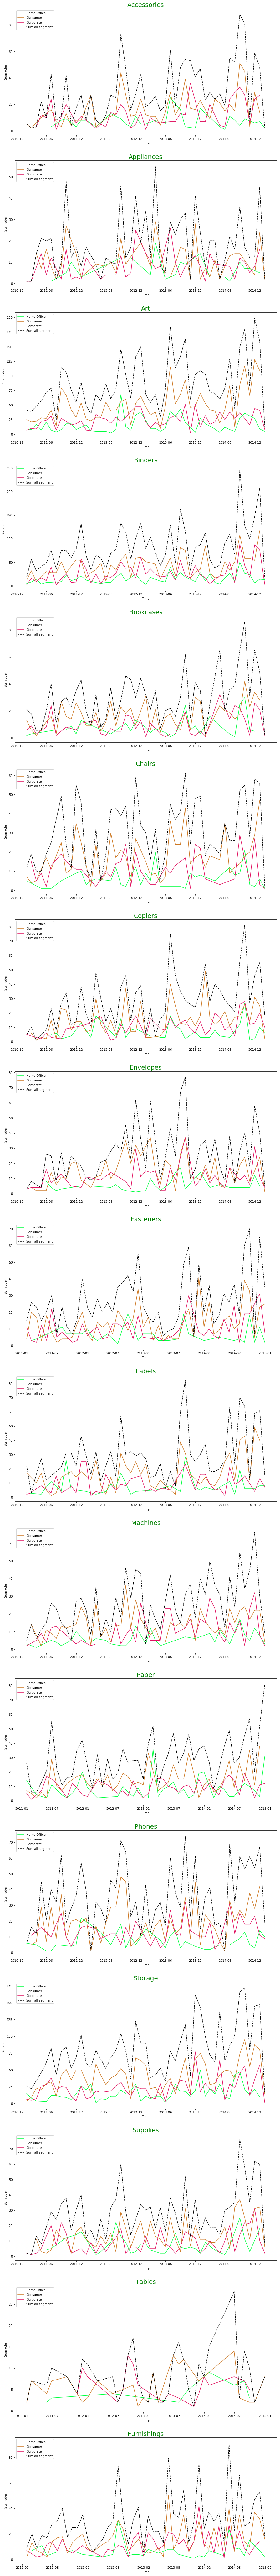

In [17]:
#report2
quantity = df.groupby([pd.Grouper(key='Ship Date', freq='1M'), 'Sub-Category', 'Segment'])['Quantity'].sum().reset_index(name='Sum quantity').rename(columns={'Ship Date':'Month'})
print(quantity.head())
quantity.to_csv('23.csv')

fig, ax = plt.subplots(quantity['Sub-Category'].nunique(), figsize=(15,150))
segment = df['Segment'].unique()
print(df['Segment'].nunique())
colorlist = ['#00FF3F', '#CC7722', '#E0115F']
for index, value in enumerate(quantity['Sub-Category'].unique()):
    quantity_ = quantity[quantity['Sub-Category']==value]
    for i in range(df['Segment'].nunique()):
        quantity0 = quantity_[quantity_['Segment']==segment[i]]
        ax[index].plot(quantity0['Month'], quantity0['Sum quantity'], c=colorlist[i], label=segment[i])
     
    sumOrder = quantity_.groupby('Month')['Sum quantity'].sum().reset_index()
    ax[index].plot(sumOrder['Month'], sumOrder['Sum quantity'], c='#000000', linestyle='--', label='Sum all segment')
    
    ax[index].set_title(value, fontsize=20, color='Green')
    ax[index].set_xlabel('Time')
    ax[index].set_ylabel('Sum oder')
    
    ax[index].legend(loc='upper left')

    
fig.show()


In [31]:
from sklearn import linear_model
sales = df.groupby(pd.Grouper(key='Ship Date', freq='1M'))['Sales'].sum().reset_index()

print(sales)
Y = sales.iloc[-1,1:]
print(Y.shape)
# print(sales[:,-1:].shape)
reg = linear_model.LinearRegression()
reg.fit(sales[:,-1:], Y)

plt.figure(figsize=(30,10))
plt.plot(sales['Ship Date'].astype('str'), sales['Sales'], c='r', marker='o')
plt.xticks(rotation=-45)
# plt.xlabel('Age', fontsize=15)
# plt.ylabel('Balance', fontsize=15)
# plt.title('Balance in each age', fontsize=20, color='blue')

plt.show()

    Ship Date   Sales
0  2011-01-31   14154
1  2011-02-28   21174
2  2011-03-31   16259
3  2011-04-30   21948
4  2011-05-31   29834
5  2011-06-30   47782
6  2011-07-31   20447
7  2011-08-31   44692
8  2011-09-30   57854
9  2011-10-31   23420
10 2011-11-30   47821
11 2011-12-31   62103
12 2012-01-31   35612
13 2012-02-29   16105
14 2012-03-31   38682
15 2012-04-30   30598
16 2012-05-31   34351
17 2012-06-30   48130
18 2012-07-31   45493
19 2012-08-31   71394
20 2012-09-30   71137
21 2012-10-31   36680
22 2012-11-30   57349
23 2012-12-31   62035
24 2013-01-31   48394
25 2013-02-28   41199
26 2013-03-31   38138
27 2013-04-30   26605
28 2013-05-31   33701
29 2013-06-30   83297
30 2013-07-31   63540
31 2013-08-31   51836
32 2013-09-30   76484
33 2013-10-31   32973
34 2013-11-30   69328
35 2013-12-31   60266
36 2014-01-31   54201
37 2014-02-28   40982
38 2014-03-31   31881
39 2014-04-30   49631
40 2014-05-31   35298
41 2014-06-30   76635
42 2014-07-31   46660
43 2014-08-31  101630
44 2014-09

TypeError: unhashable type: 'slice'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
ID               1000 non-null int64
Name             1000 non-null object
Industry         1000 non-null object
Description      999 non-null object
Year Founded     1000 non-null int64
Employees        1000 non-null int64
State            1000 non-null object
City             1000 non-null object
Metro Area       989 non-null object
2015 Revenue     1000 non-null float64
2015 Expenses    1000 non-null float64
2015 Profit      1000 non-null float64
2015 Growth %    1000 non-null float64
2014 Revenue     1000 non-null int64
2014 Expenses    1000 non-null float64
2014 Profit      1000 non-null float64
2014 Growth %    920 non-null float64
2013 Revenue     920 non-null float64
2013 Expenses    920 non-null float64
2013 Profit      920 non-null float64
dtypes: float64(10), int64(4), object(6)
memory usage: 164.1+ KB
None


C:\Users\Training\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Training\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


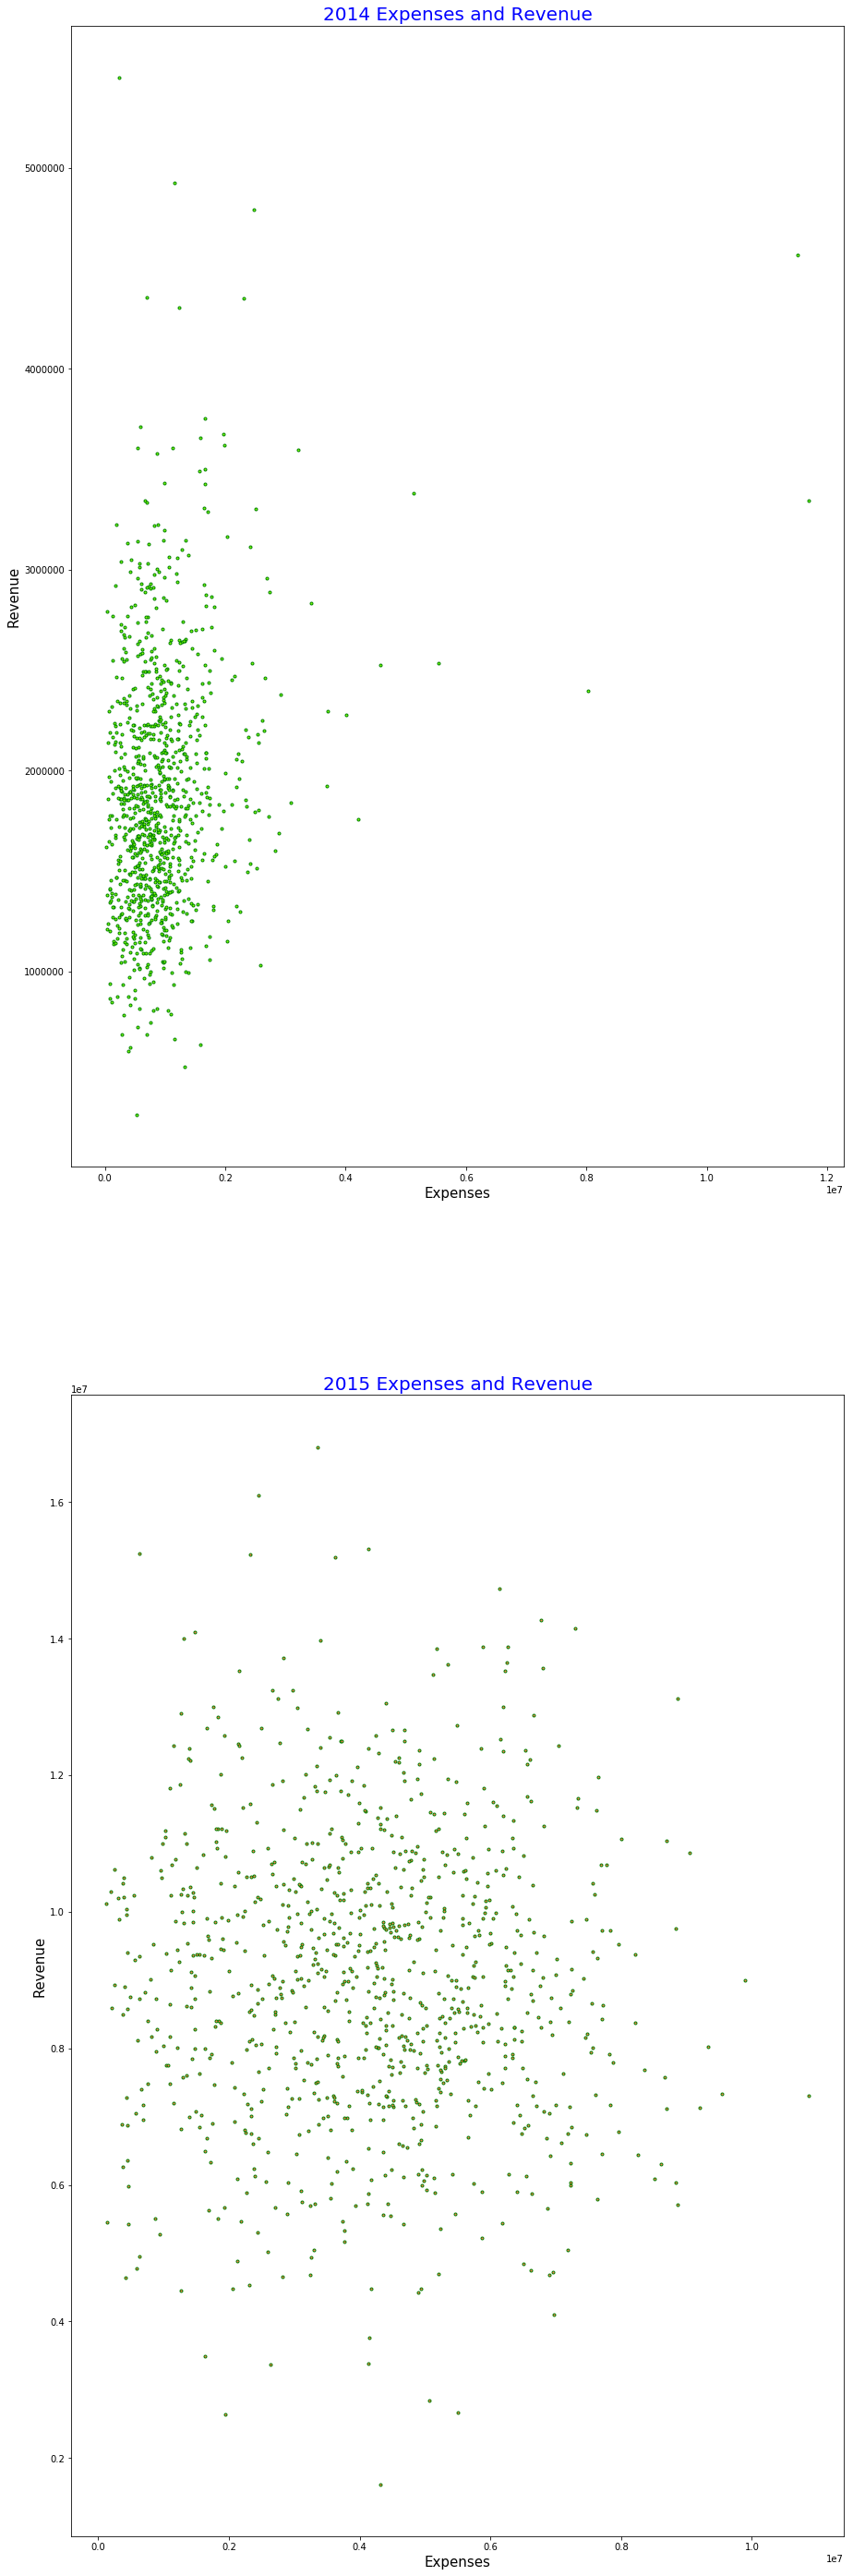

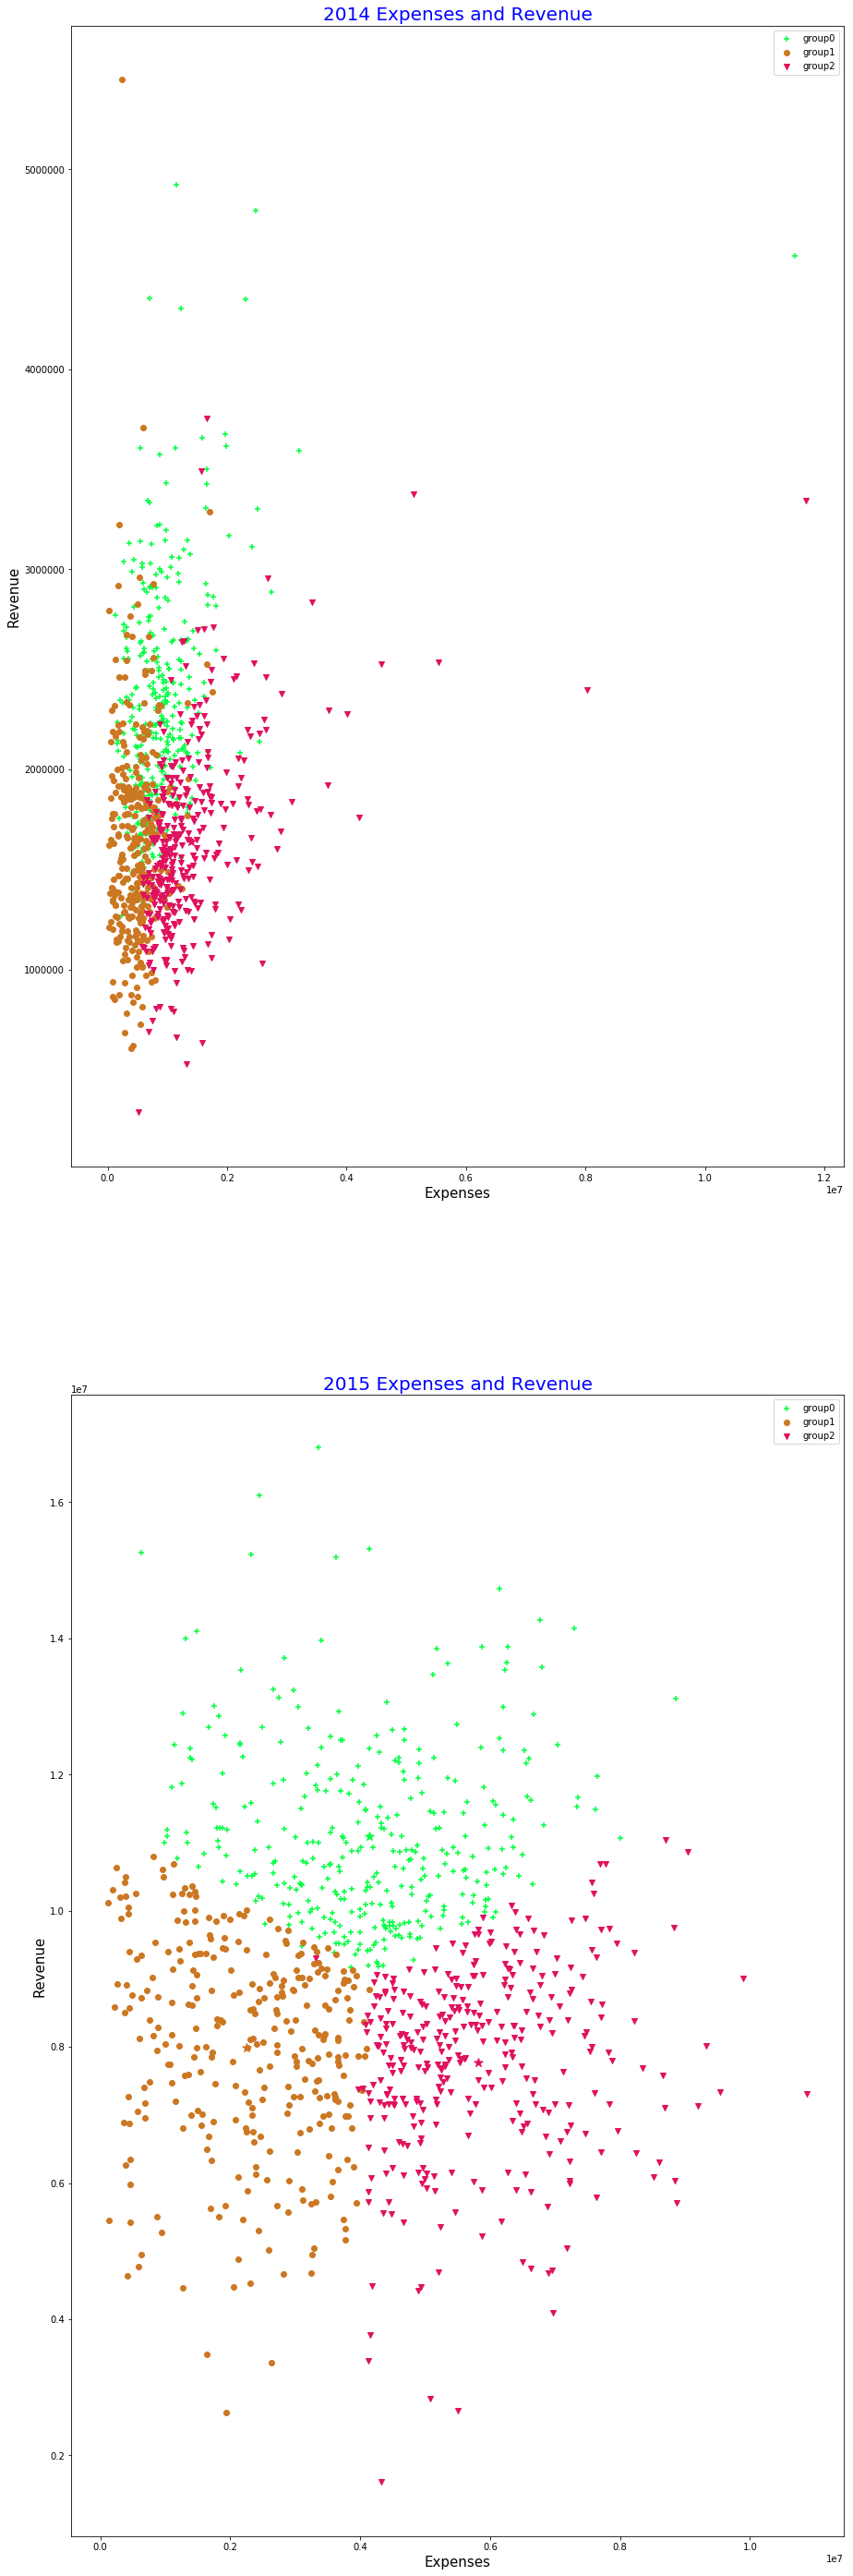

In [8]:
#Ex3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib

df0 = pd.read_excel('./Assignment 6-Data/Startups.xlsx', sheet_name='Overview')
df1 = pd.read_excel('./Assignment 6-Data/Startups.xlsx', sheet_name='Financials')
df = pd.merge(df0, df1.iloc[:,1:], on='Name')
print(df.info())

fig, ax = plt.subplots(2, figsize=(15,50))
ax[0].scatter(df['2014 Expenses'], df['2014 Revenue'], c='#7FFF00', edgecolors='g', marker='.')
ax[0].set_title('2014 Expenses and Revenue', fontsize=20, color='blue')
ax[0].set_xlabel('Expenses', fontsize=15)
ax[0].set_ylabel('Revenue', fontsize=15)

ax[1].scatter(df['2015 Expenses'], df['2015 Revenue'], c='#FF7F50', edgecolors='g', marker='.')
ax[1].set_title('2015 Expenses and Revenue', fontsize=20, color='blue')
ax[1].set_xlabel('Expenses', fontsize=15)
ax[1].set_ylabel('Revenue', fontsize=15)

fig.show()

X = df[['Name', '2014 Expenses', '2014 Revenue', '2015 Expenses', '2015 Revenue']]
kmean = KMeans(n_clusters=3, random_state=0)
kmean = kmean.fit(X.iloc[:,1:])
X['label'] = kmean.predict(X.iloc[:,1:])
Center = kmean.cluster_centers_


colorlist = ['#00FF3F', '#CC7722', '#E0115F']
markerlist = ['+', 'o', 'v']
fig, ax = plt.subplots(2, figsize=(15,50))
for i in range(3):
    X_ = X[X['label']==i]

    ax[0].scatter(X_['2014 Expenses'], X_['2014 Revenue'], c=colorlist[i], marker=markerlist[i], label='group'+str(i))
    ax[0].scatter(Center[i][0], Center[i][1], c=colorlist[i], marker='*', s= 100)
    ax[0].set_title('2014 Expenses and Revenue', fontsize=20, color='blue')
    ax[0].set_xlabel('Expenses', fontsize=15)
    ax[0].set_ylabel('Revenue', fontsize=15)
    ax[0].legend(loc='upper right')

    ax[1].scatter(X_['2015 Expenses'], X_['2015 Revenue'], c=colorlist[i], marker=markerlist[i], label='group'+str(i))
    ax[1].scatter(Center[i][2], Center[i][3], c=colorlist[i], marker='*', s= 100)
    ax[1].set_title('2015 Expenses and Revenue', fontsize=20, color='blue')
    ax[1].set_xlabel('Expenses', fontsize=15)
    ax[1].set_ylabel('Revenue', fontsize=15)
    ax[1].legend(loc='upper right')

fig.show()

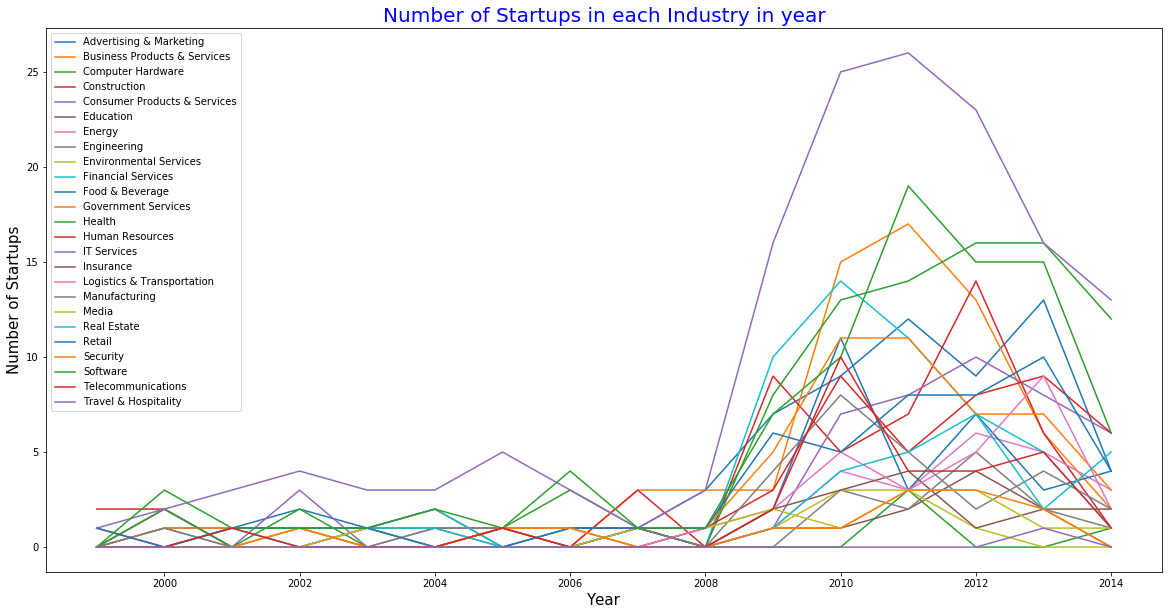

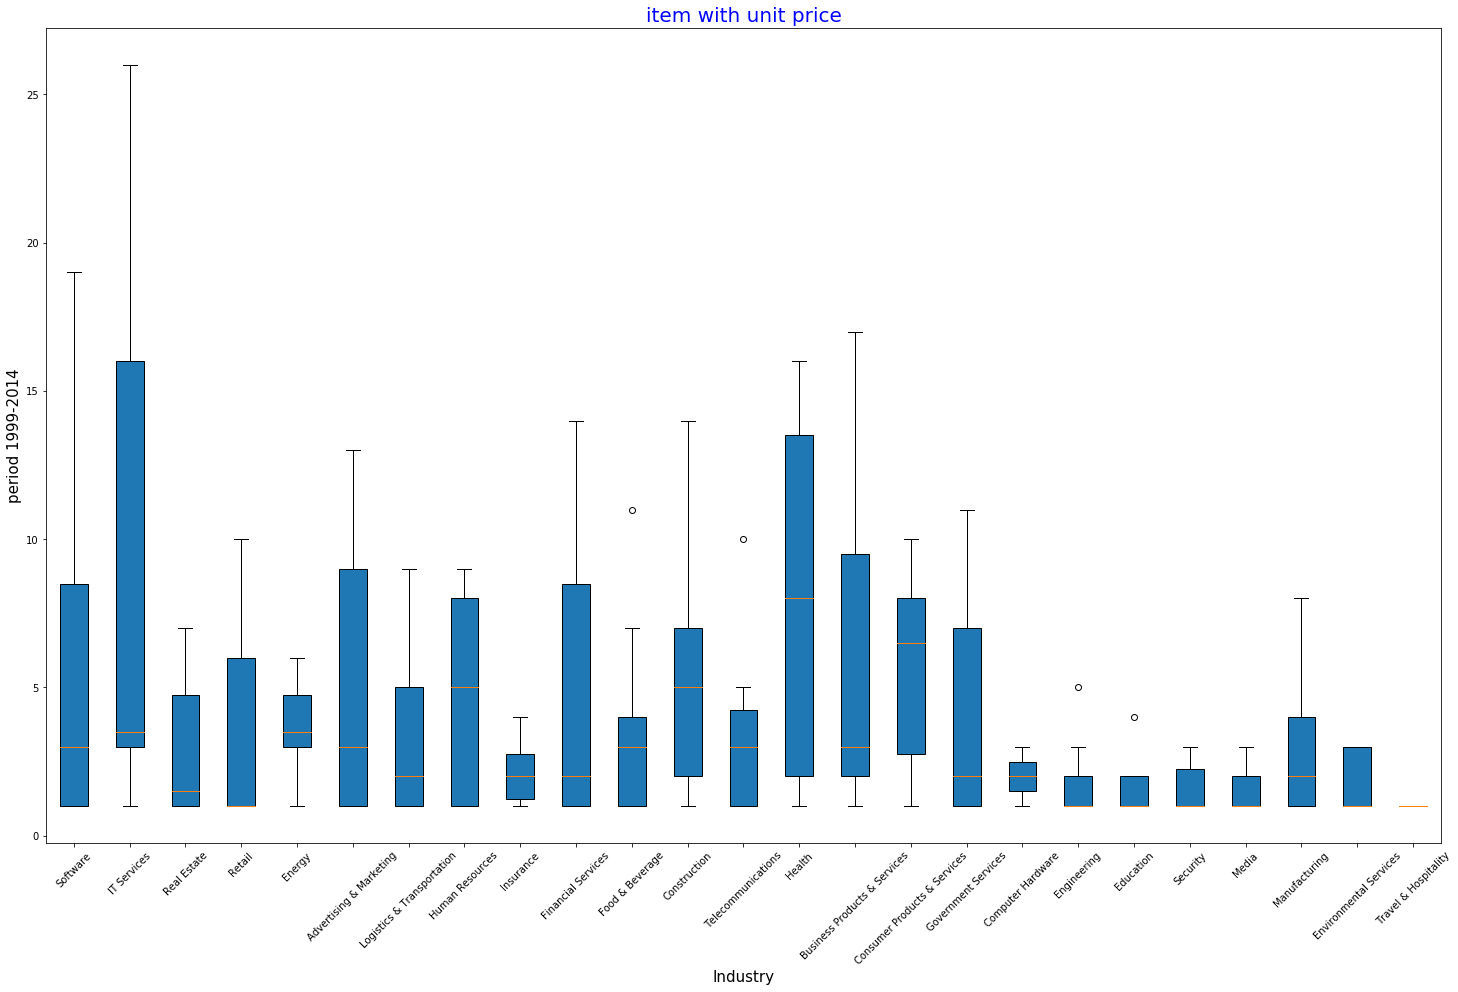

In [78]:
#report2

year0 = df.groupby(['Year Founded', 'Industry'])['Name'].nunique().reset_index(name='Number or Startups')
newYear = df.groupby(['Year Founded'])['Name'].nunique().reset_index(name='Number or Startups')
year = year0.pivot(index='Year Founded', columns='Industry', values='Number or Startups').fillna(0)
# print(year0)


labels = year.columns

plt.figure(figsize=(20,10))
plt.plot(year)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Startups', fontsize=15)
plt.title('Number of Startups in each Industry in year', fontsize=20, color = 'blue')
plt.legend(labels, loc='upper left')
plt.show()

boxYear = []
for industry_ in df['Industry'].unique():
    value = year0[year0['Industry']==industry_]
    value.reset_index(inplace=True)
#     print(value)
    boxIndustry = []
    for year_ in year0['Year Founded'].unique():
        value_ = value[value['Year Founded']==year_].loc[:,'Number or Startups'].values
        for i in value_:
            boxIndustry.append(value_)
        while 0 in boxIndustry:
            boxIndustry.remove(0)
    boxYear.append(boxIndustry)

label = df['Industry'].unique()
plt.figure(figsize=(25,15))
plt.boxplot(boxYear, vert=True, patch_artist=True, labels=label)
plt.title('item with unit price', color = 'blue', fontsize=20)
plt.ylabel('period 1999-2014', fontsize=15)
plt.xlabel('Industry', fontsize=15, rotation=0)
plt.xticks(rotation=45)
plt.show()


In [1]:
import matplotlib.pyplot as plt

plt.plot()

[]